In [1]:
import pandas as pd
import random
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [2]:
data_train = pd.read_csv('Mushroom_datasets/mushroom_train.csv')
data_test = pd.read_csv('Mushroom_datasets/mushroom_test.csv')
data_train.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,4.98,c,i,y,f,a,c,n,6.04,6.21,w,f,f,d,a,p
1,2.84,x,y,y,f,a,c,w,5.66,3.55,y,t,r,h,u,p
2,11.44,x,y,y,f,a,c,w,7.03,25.29,n,t,e,d,w,e
3,8.77,s,t,r,t,d,c,g,4.44,13.61,r,f,f,d,a,p
4,7.55,x,d,n,t,p,c,y,8.41,18.44,y,f,f,d,a,e


# Trival System

In [3]:
N = data_train.shape[0]
N1 = data_train[data_train['class']=='p'].shape[0]
N2 = data_train[data_train['class']=='e'].shape[0]
N_test = data_test['class'].shape[0]
pred = []
for _ in range(N_test):
    if random.random() < N1/N:
        pred.append('p')
    else:
        pred.append('e')

acc = 0
for i in range(N_test):
    if pred[i] == data_test['class'][i]:
        acc+=1
        
print("Accuracy of train dataset is", acc*100/N)

Accuracy of train dataset is 21.732010854308975


In [4]:
f1 = f1_score(data_test['class'], pred, pos_label='e')
print("F1 score:", f1)

F1 score: 0.4426340801086219


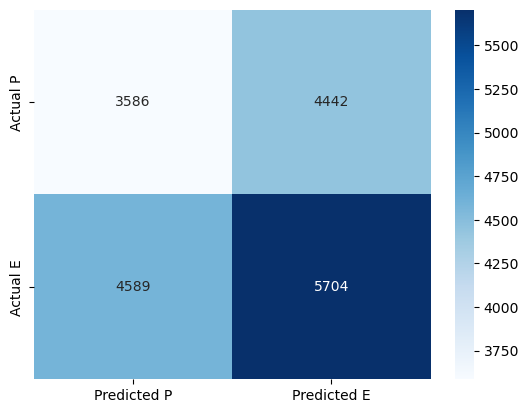

In [5]:
cm = confusion_matrix(data_test
                      ['class'], pred)
cm_df = pd.DataFrame(cm, index=['Actual P', 'Actual E'], columns=['Predicted P', 'Predicted E'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.show()

# Baseline system

In [6]:
data_train['cap-shape'].unique()

array(['c', 'x', 's', 'o', 'f', 'b', 'p'], dtype=object)

In [7]:
data_train['cap-surface'].unique()

array(['i', 'y', 't', 'd', 'g', 'h', 'k', 's', 'e', 'w', 'l'],
      dtype=object)

In [8]:
data_train['cap-color'].unique()

array(['y', 'r', 'n', 'w', 'g', 'k', 'o', 'l', 'e', 'u', 'b', 'p'],
      dtype=object)

In [9]:
data_train['does-bruise-or-bleed'].unique()

array(['f', 't'], dtype=object)

In [10]:
data_train['gill-attachment'].unique()

array(['a', 'd', 'p', 'x', 'e', 'f', 's'], dtype=object)

In [11]:
data_train['gill-spacing'].unique()

array(['c', 'd', 'f'], dtype=object)

In [12]:
data_train['gill-color'].unique()

array(['n', 'w', 'g', 'y', 'p', 'k', 'f', 'b', 'e', 'o', 'r', 'u'],
      dtype=object)

In [13]:
data_train['stem-color'].unique()

array(['w', 'y', 'n', 'r', 'o', 'g', 'l', 'e', 'u', 'f', 'k', 'p', 'b'],
      dtype=object)

In [14]:
data_train['has-ring'].unique()

array(['f', 't'], dtype=object)

In [15]:
data_train['ring-type'].unique()

array(['f', 'r', 'e', 'z', 'l', 'p', 'g', 'm'], dtype=object)

In [16]:
data_train['habitat'].unique()

array(['d', 'h', 'g', 'l', 'm', 'w', 'p', 'u'], dtype=object)

In [17]:
data_train['season'].unique()

array(['a', 'u', 'w', 's'], dtype=object)

In [18]:
data_train['class'].unique()

array(['p', 'e'], dtype=object)